In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from PIL import Image

In [9]:
path = "AffectNet\\affectnet\\"
files = glob.glob(path + "*.jpg", recursive=True) # get a list of paths to all the jpg image files from the dataset

In [23]:
class_to_int = {"class001":6, "class002":3, "class003":4, "class004":5, "class005":2, "class006":1, "class007":0}

data = []
for file_path in files:
    file_name_split = file_path.split("\\")[2].split("_")
    im = Image.open(file_path).convert('L').getdata()
    data.append([
        class_to_int[file_name_split[11]],
        " ".join(map(str, list(im))),
        im.size[0],
        im.size[1]
    ])

df = pd.DataFrame(data, columns=["emotion","pixels", "width", "height"])

In [27]:
df.drop_duplicates(inplace=True)

In [47]:
df.dropna(inplace=True)

In [ ]:
df.shape

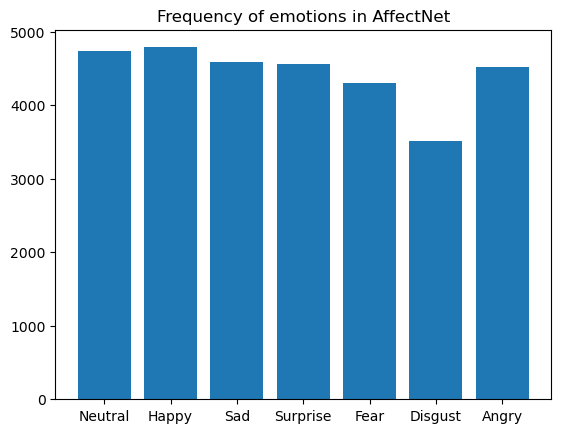

In [32]:
int_to_emotion = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}

emotions = df["emotion"].unique()
emotion_freq = dict()

for emotion in emotions:
    emotion_freq[int_to_emotion[emotion]] = df["emotion"].value_counts()[emotion]

fig, ax = plt.subplots()
ax.bar(emotion_freq.keys(), emotion_freq.values())
ax.set_title("Frequency of emotions in AffectNet")

plt.show()

Emotion Categories:
- Neutral: 4731
- Happy: 4787
- Sad: 4588
- Surprise: 4565
- Fear: 4306
- Disgust: 3516
- Angry: 4522

Total Images: 31015

In [35]:
labels = df.loc[:, 'emotion'] 
pixel_list = df.loc[:, 'pixels']

images = np.array([np.fromstring(pixels, dtype=int, sep=" ") for pixels in pixel_list])

In [ ]:
# Display an image
img_num = 11

# Reshape
image = images[img_num].reshape(128, 128, 1).astype('float32')

# Display
plt.imshow(image, cmap="gist_gray")
int_to_emotion[df.iloc[img_num]["emotion"]]

In [49]:
df.to_csv("AffectNet.csv", index=False)